In [247]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyper as pr
from scipy import stats
import scipy
import statsmodels.api as sm

%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context('talk')
plt.style.use('dark_background')

In [248]:
df = pd.read_csv('./data3a.csv')
df['Intercept'] = 1.0

In [249]:
df2 = df.copy()

In [250]:
for i in range(2,7,1):
    df2["x" + str(i)] = df2['x']**i
df2 = df2.rename(columns={'x': 'x1'})

In [251]:
glm = sm.GLM(endog=df['y'], exog=df2[['Intercept', 'x1']], family=sm.families.Poisson())
fit1 = glm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Mon, 18 Jun 2018   Deviance:                       84.993
Time:                        20:22:41   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x1             0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [252]:
glm = sm.GLM(endog=df['y'], exog=df2[['Intercept', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']], family=sm.families.Poisson())
fit6 = glm.fit()
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       93
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -232.58
Date:                Mon, 18 Jun 2018   Deviance:                       79.385
Time:                        20:22:41   Pearson chi2:                     76.7
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8185.6246   7764.781      1.054      0.292   -7033.067    2.34e+04
x1         -4980.3818   4833.712     -1.030      0.303   -1.45e+04    4493.521
x2          1251.8054   1245.519      1.005      0.315   -1189.367    3692.978
x3          -166.4112    170.083     -0.978      0.328    -499.767     166.945
x4            12.3450     12.985      0.951      0.342     -13.105      37.795
x5            -0.4847      0.526     -0.922      0.356      -1.515       0.545
x6             0.0079      0.009      0.893      0.372      -0.009       0.025
==============================================================================
"""

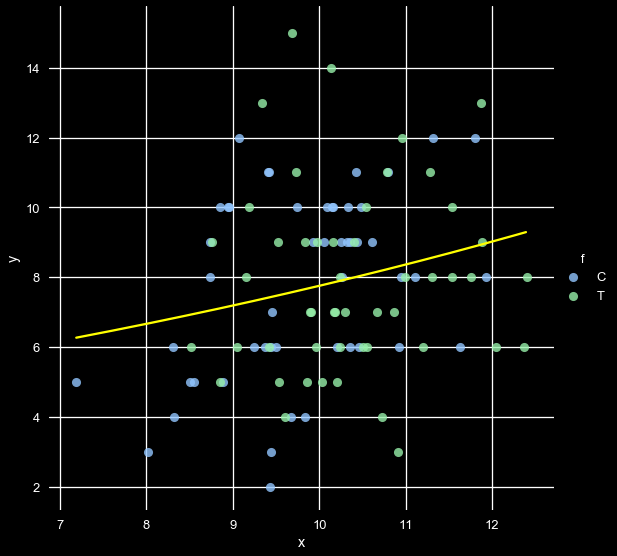

In [253]:
xx = np.arange(min(df['x']), max(df['x']), 0.01)
yy = np.exp(fit1.params[0] + fit1.params[1]*xx)
sns.lmplot(x='x', y='y', hue='f', data=df, palette='pastel', fit_reg=False, size=8)
plt.plot(xx, yy, color = "yellow")

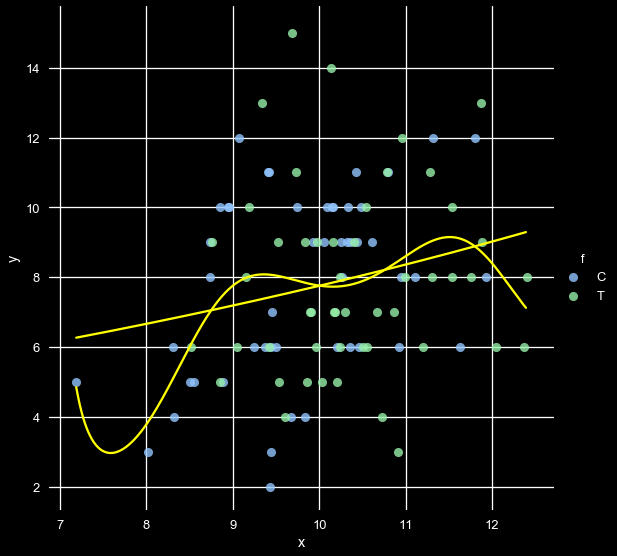

In [254]:
xx = np.arange(min(df['x']), max(df['x']), 0.01)
yy1 = np.exp(fit1.params[0] + fit1.params[1]*xx)
yy6 = np.exp(fit6.params[0] + fit6.params[1]*xx + fit6.params[2]*(xx**2) + fit6.params[3]*(xx**3) + fit6.params[4]*(xx**4)
            + fit6.params[5]*(xx**5) + fit6.params[6]*(xx**6) )

sns.lmplot(x='x', y='y', hue='f', data=df, palette='pastel', fit_reg=False, size=8)
plt.plot(xx, yy1, color = "yellow")
plt.plot(xx, yy6, color = "yellow")

各種逸脱度の計算

In [255]:
fit1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            474.7725 
Link Function:      log              BIC:            -366.3137
Dependent Variable: y                Log-Likelihood: -235.39  
Date:               2018-06-18 20:22 LL-Null:        -237.64  
No. Observations:   100              Deviance:       84.993   
Df Model:           1                Pearson chi2:   83.8     
Df Residuals:       98               Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept      1.2917    0.3637  3.5517  0.0004  0.5789  2.0045
x1             0.0757    0.0356  2.1251  0.0336  0.0059  0.1454
==============================================================

"""

In [256]:
fit1.aic

474.7725015397216

In [257]:
df2 = df2.loc[:,['y','f','Intercept', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']]

In [258]:
df2.iloc[:,1:].head()

,f,Intercept,x1,x2,x3,x4,x5,x6
0,C,1.0,8.31,69.0561,573.856191,4768.744947,39628.270511,3.293109e+05
1,C,1.0,9.44,89.1136,841.232384,7941.233705,74965.246175,7.076719e+05
2,C,1.0,9.50,90.2500,857.375000,8145.062500,77378.093750,7.350919e+05
3,C,1.0,9.07,82.2649,746.142643,6767.513772,61381.349912,5.567288e+05
4,C,1.0,10.16,103.2256,1048.772096,10655.524495,108260.128873,1.099923e+06


In [266]:
glm, fit, AIC, L, deviance, res_deviance = [], [], [], [], [], []
for i in range(7):
    glm.append(sm.GLM(endog=df2['y'], exog=df2.iloc[:,2:i+3], family=sm.families.Poisson()))
    fit.append(glm[i].fit())
    AIC.append(fit[i].aic)
    L.append(fit[i].llf)
    deviance.append(-2 * L[i])
    res_deviance.append(fit[i].deviance)

In [260]:
multi_glm_df = pd.DataFrame((np.c_[L, deviance, res_deviance, AIC]), columns=('L', 'deviance', 'res deviance', 'AIC'))

In [261]:
round(multi_glm_df,1)

,L,deviance,res deviance,AIC
0,-237.6,475.3,89.5,477.3
1,-235.4,470.8,85.0,474.8
2,-234.4,468.8,83.0,474.8
3,-234.3,468.7,82.9,476.7
4,-234.2,468.5,82.7,478.5
5,-233.0,466.0,80.2,478.0
6,-232.6,465.2,79.4,479.2


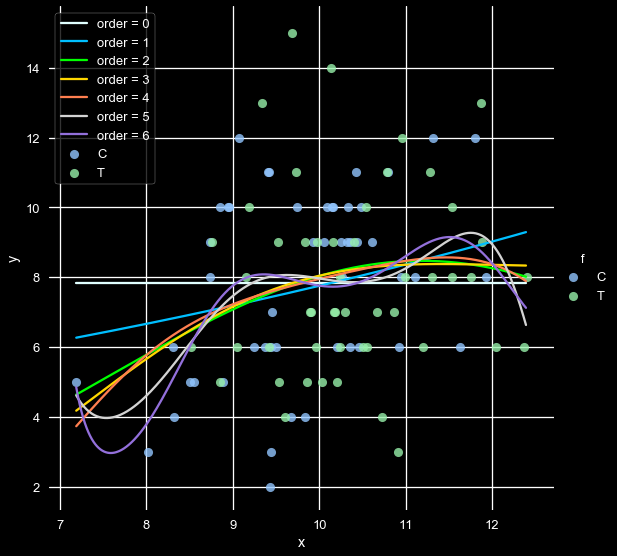

In [311]:
colors = ['lightcyan', 'deepskyblue', 'lime', 'gold', 'coral', 'lightgray', 'mediumpurple']
sns.lmplot(x='x', y='y', hue='f', data=df, palette='pastel', fit_reg=False, size=8)
xx = np.arange(min(df['x']), max(df['x']), 0.01)
z = np.zeros(xx.shape)
for i in range(7):
    z = np.zeros(xx.shape)
    yy = np.zeros(xx.shape)
    for j in range(i+1):
        z = z + fit[i].params[j]*(xx**j)
    yy = np.exp(z)
    plt.plot(xx, yy, color = colors[i], label='order = %s'%i)

plt.legend(frameon = True)


In [158]:
df3 = df.copy()
df3 = df3.loc[:,['y','Intercept', 'x', 'f']]
df3['f'] = pd.get_dummies(df['f'])['T']

In [159]:
df3.head()

,y,Intercept,x,f
0,6,1.0,8.31,0
1,6,1.0,9.44,0
2,6,1.0,9.50,0
3,12,1.0,9.07,0
4,10,1.0,10.16,0


In [206]:
glm, fit, AIC, L, deviance, res_deviance = [], [], [], [], [], []
glm.append(sm.GLM(endog=df3['y'], exog=df3.loc[:,'Intercept'], family=sm.families.Poisson()))
glm.append(sm.GLM(endog=df3['y'], exog=df3.loc[:,['Intercept', 'x']], family=sm.families.Poisson()))
glm.append(sm.GLM(endog=df3['y'], exog=df3.loc[:,['Intercept', 'f']], family=sm.families.Poisson()))
glm.append(sm.GLM(endog=df3['y'], exog=df3.loc[:,['Intercept', 'x', 'f']], family=sm.families.Poisson()))

for i in range(len(glm)):
    fit.append(glm[i].fit())
    AIC.append(fit[i].aic)
    L.append(fit[i].llf)
    deviance.append(-2 * L[i])
    res_deviance.append(fit[i].deviance)

#full model
dpois = lambda x:scipy.stats.poisson.logpmf(x, x)
L.append(np.sum(dpois(df3['y'])))
deviance.append(-2 * L[-1])
res_deviance.append(0.0)
AIC.append( deviance[-1] + 2 * len(df3['y']) )

In [207]:
multi_glm_df = pd.DataFrame((np.c_[L, deviance, res_deviance, AIC]),
                            columns=('L', 'deviance', 'res deviance', 'AIC'),
                            index=('一定', 'f', 'x', 'x + f', 'full'))

In [208]:
round(multi_glm_df,2)

,L,deviance,res deviance,AIC
一定,-237.64,475.29,89.51,477.29
f,-235.39,470.77,84.99,474.77
x,-237.63,475.25,89.48,479.25
x + f,-235.29,470.59,84.81,476.59
full,-192.89,385.78,0.00,585.78
